In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp
import lsst.sims.maf.db as db
import lsst.sims.maf.utils as utils
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.metricBundles as metricBundles
from mafContrib import PeriodicStarMetric 

In [2]:
outDir ='starfit'
dbFile = 'enigma_1189_sqlite.db'
opsimdb = utils.connectOpsimDb(dbFile)
resultsDb = db.ResultsDb(outDir=outDir)

In [3]:
# Set RA, Dec for a single point in the sky. in radians.
ra = np.radians(0.)
dec = np.radians(0.)

metric = PeriodicStarMetric()
slicer = slicers.UserPointsSlicer(ra,dec,lonCol='ditheredRA',latCol='ditheredDec')
slicer.slicePoints['distMod'] = np.array([5.])
sql = 'night < 1400'
bundle = metricBundles.MetricBundle(metric,slicer,sql)
bg =  metricBundles.MetricBundleGroup({0:bundle}, opsimdb,
                                      outDir=outDir, resultsDb=resultsDb)

In [4]:
bg.runAll()

Querying database with constraint night < 1400
Found 954225 visits
Running:  [0]
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


In [5]:
bundle.metricValues

masked_array(data = [0.909],
             mask = [False],
       fill_value = -666.0)

In [6]:
metric = PeriodicStarMetric(nMonte=10)
nside = 4
slicer = slicers.HealpixSlicer(nside,lonCol='ditheredRA',latCol='ditheredDec')
# Let's make the distance modulus vary with healpix ID.
distMod = np.arange(0.,slicer.slicePoints['dec'].size)
distMod = distMod/distMod.max()*12.
slicer.slicePoints['distMod'] = distMod

sql = 'night < 1400'
bundle = metricBundles.MetricBundle(metric,slicer,sql)
bg =  metricBundles.MetricBundleGroup({0:bundle}, opsimdb,
                                      outDir=outDir, resultsDb=resultsDb)

Healpix slicer using NSIDE=4, approximate resolution 879.484521 arcminutes


Querying database with constraint night < 1400
Found 954225 visits
Running:  [0]
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with night < 1400 sqlconstraint now.
monopole: 0.663164  dipole: lon: 92.9486, lat: 84.6789, amp: 0.711083
Plotting complete.


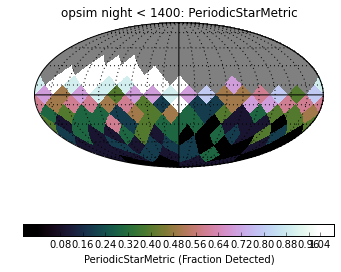

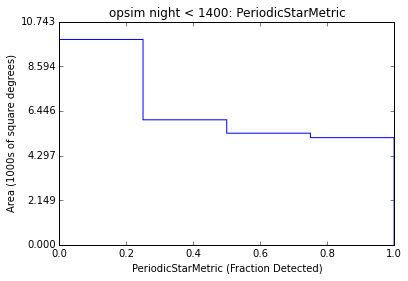

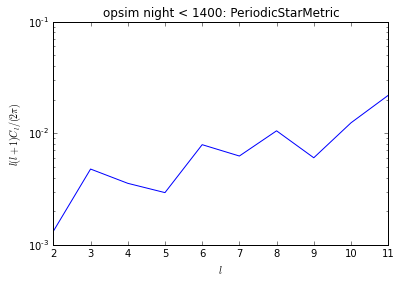

In [7]:
bg.runAll()
bg.plotAll(closefigs=False)